#**TUGAS PRAKTIKUM MANDIRI 7 - MACHINE LEARNING (LINEAR REGRESSION)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi


#**PENJELASAN DATASET**

Dataset dataset_satelit.csv merupakan kumpulan data hasil integrasi antara pengukuran laboratorium tanah dengan data penginderaan jauh satelit. Data ini digunakan untuk menganalisis kondisi unsur hara tanah, terutama unsur Nitrogen (N), Phosfor (P), dan Kalium (K) pada suatu wilayah pengamatan.

Dataset ini berisi 594 titik sampel tanah, di mana setiap titik mencakup:

- Koordinat geografis (longitude dan latitude),

- Kandungan unsur hara tanah hasil uji laboratorium,

- serta nilai reflektansi dan backscatter dari citra satelit.

Secara keseluruhan, dataset ini memiliki 34 variabel numerik, yang menggambarkan hubungan antara karakteristik citra satelit dengan kondisi kimia tanah.
Data ini digunakan dalam penelitian untuk membangun model prediksi kadar unsur Nitrogen (N) menggunakan algoritma Linear Regression.

#**1. Import Library**

In [28]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Penjelasan Library :

- pandas → digunakan untuk membaca, mengelola, dan memanipulasi data dalam bentuk tabel (DataFrame).

- numpy → digunakan untuk melakukan berbagai operasi matematis dan komputasi numerik.

- matplotlib & seaborn → digunakan untuk membuat visualisasi data seperti grafik, scatter plot, dan heatmap agar analisis lebih mudah dipahami.

- sklearn (scikit-learn) → merupakan library utama dalam machine learning yang digunakan untuk pembagian data (train-test split), pembuatan model, dan evaluasi performa model.

#**2. Loading Dataset**

Kode di bawah ini untuk menghubungkan colab dengan drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Membaca file CSV menggunakan Pandas**

Selanjutnya, kode menggunakan library Pandas untuk membaca data dari file. Variabel path berisi lokasi folder di Google Drive tempat file data_satelit.csv disimpan. Lalu, fungsi pd.read_csv() dipakai untuk membaca file CSV tersebut dan menyimpannya ke dalam DataFrame, sehingga datanya bisa diproses lebih lanjut.

In [4]:
# Membaca file csv menggunakan pandas
df = pd.read_csv("/content/gdrive/MyDrive/SEMESTER 7/Machine Learning/praktikum07/data/dataset_satelit.csv")
df

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,103.605867,0.057633,2.49,0.16,0.347,0.78,0.86,63.38,269.95,...,0.2336,0.13050,0.09390,0.12700,0.09860,0.02600,0.00870,0.01690,0.00930,0.01630
590,591,103.606717,0.057100,2.74,0.15,0.466,0.73,0.5,51.04,683.42,...,0.2506,0.21280,0.15920,0.20060,0.14730,0.03870,0.01380,0.02290,0.01270,0.01640
591,592,103.606250,0.056767,2.63,0.15,0.422,0.82,0.59,82.57,396.18,...,0.3413,0.27730,0.17820,0.25790,0.18690,0.04620,0.01250,0.02250,0.01600,0.01930
592,593,103.606400,0.056517,2.75,0.17,0.502,0.69,0.53,102.07,246.35,...,0.3413,0.32740,0.28760,0.29970,0.22250,0.05290,0.01800,0.03350,0.01790,0.01930


Terdapat 594 baris dan 34 kolom pada dataset collage tersebut.

#**3. Menampilkan informasi detail dengan df.info()**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

Terdapat 3 type data dari 34 kolom, float (32), int (1) dan object (1)

**Statsistik Deskriptif Dataset**

Kode df.describe() yang digunakan untuk menampilkan statistik deskriptif dari semua kolom numerik pada dataset.

In [6]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


Menampilkan ringkasan statistik berupa jumlah data (count), nilai rata-rata (mean), simpangan baku (std), serta nilai minimum, maksimum, dan kuartil (25%, 50%, 75%) untuk tiap variabel numerik.

Hasilnya menunjukkan bahwa dataset memiliki 594 sampel dengan nilai variabel yang bervariasi. Informasi ini membantu memahami sebaran data, kisaran nilai, dan potensi adanya nilai ekstrem (outlier) sebelum dilakukan pemodelan.

#**4. Data Preprocessing**

**Mengecek Missing Value**

Kode di bawah ini adalah mengecekan missing value, apakah terdapat nilai yang kotor atau tidak.

In [7]:
# cek missing value
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,1
Ca,0
Mg,0
Fe,0
Mn,0


Terdapa nilai missing value pada kolom K, hanya 1 saja.

**Menghapus missing value**

In [8]:
df = df.dropna()
df

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,103.605867,0.057633,2.49,0.16,0.347,0.78,0.86,63.38,269.95,...,0.2336,0.13050,0.09390,0.12700,0.09860,0.02600,0.00870,0.01690,0.00930,0.01630
590,591,103.606717,0.057100,2.74,0.15,0.466,0.73,0.5,51.04,683.42,...,0.2506,0.21280,0.15920,0.20060,0.14730,0.03870,0.01380,0.02290,0.01270,0.01640
591,592,103.606250,0.056767,2.63,0.15,0.422,0.82,0.59,82.57,396.18,...,0.3413,0.27730,0.17820,0.25790,0.18690,0.04620,0.01250,0.02250,0.01600,0.01930
592,593,103.606400,0.056517,2.75,0.17,0.502,0.69,0.53,102.07,246.35,...,0.3413,0.32740,0.28760,0.29970,0.22250,0.05290,0.01800,0.03350,0.01790,0.01930


In [9]:
# cek missing value
df.isnull().sum()

,0
No,0
Longitude,0
Lattitude,0
N,0
P,0
K,0
Ca,0
Mg,0
Fe,0
Mn,0


Data sudah dibersihkan dan sudah tidak ada lagi missing value di dalamnya.

In [10]:
# Mengecek apakah ada duplikat data
df.duplicated().sum()

np.int64(0)

Tidak ada duplikat data pada dataset satelit ini.

#**5. Analisis Korelasi**

menghitung nilai korelasi antara variabel target (N) dengan seluruh kolom numerik lainnya pada dataset.
Fungsi df.corr() digunakan untuk mengukur seberapa kuat hubungan antar variabel (nilai antara -1 sampai +1).

In [31]:
# Menampilkan korelasi hanya terhadap target 'N'
corr_target = df.corr(numeric_only=True)['N'].sort_values(ascending=False)
corr_target

,N
N,1.000000
Lattitude,0.742610
P,0.643028
b9,0.536300
b8a,0.529205
b8,0.527935
Sigma_VH,0.504842
Sigma_VV,0.456747
Mn,0.384580
b5,0.375805


Daftar nilai korelasi setiap fitur terhadap N, diurutkan dari yang paling tinggi hingga paling rendah.
Nilai positif berarti hubungan searah (jika fitur naik, N juga naik),
sedangkan nilai negatif berarti hubungan berlawanan arah (jika fitur naik, N turun).

Penjelasan lebih jelas :
- Fitur dengan korelasi positif tinggi, seperti Lattitude (0.74) dan P (0.64), memiliki hubungan kuat dengan kadar N.
- Sebaliknya, fitur seperti Longitude (-0.69) dan iafe (-0.59) berkorelasi negatif, artinya saat nilai fitur meningkat, kadar N cenderung menurun.

Analisis ini membantu menentukan fitur-fitur yang paling berpengaruh untuk digunakan sebagai variabel input (X) dalam model Linear Regression untuk memprediksi nilai N.

**Bar chart Korelasi**

Kode di bawah ini untuk menampilkan 10 variabel dengan nilai korelasi tertinggi terhadap variabel target N.
Data diambil dari hasil analisis korelasi sebelumnya (corr_target), kemudian divisualisasikan dalam bentuk grafik batang (bar chart).

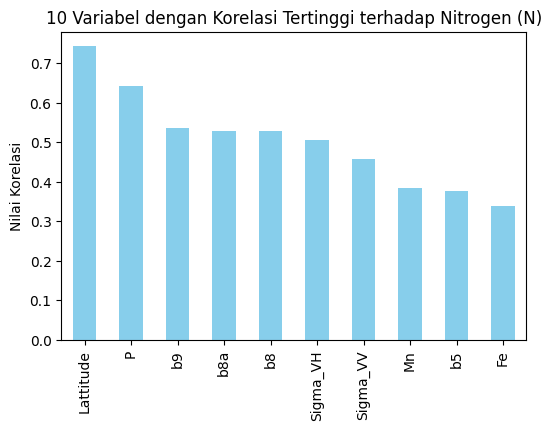

In [30]:
plt.figure(figsize=(6,4))
corr_target.drop('N').sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title("10 Variabel dengan Korelasi Tertinggi terhadap Nitrogen (N)")
plt.ylabel("Nilai Korelasi")
plt.show()

Semakin tinggi batangnya, semakin kuat hubungan fitur tersebut dengan N. Berdasarkan grafik, variabel seperti Lattitude, P, b9, dan b8a memiliki korelasi tertinggi terhadap N, artinya perubahan nilai pada variabel tersebut cenderung diikuti oleh perubahan kadar Nitrogen.
Grafik ini membantu dalam pemilihan fitur (feature selection) untuk membangun model Linear Regression yang lebih akurat.

#**6. Menentukan Target dan Fitur**

In [34]:
# Tentukan variabel target (yang ingin diprediksi) dan fitur (variabel input)
y = df['N']   # target: kadar Nitrogen
X = df[['Sigma_VV', 'Sigma_VH', 'gamma0_vv', 'gamma0_vh',
        'beta0_vv', 'beta0_vh', 'b1', 'plia', 'lia', 'iafe']]

Menentukan variabel target dan fitur yang akan digunakan dalam model. Variabel N ditetapkan sebagai target karena ingin memprediksi kadar Nitrogen dalam tanah, sedangkan variabel seperti Sigma_VV, Sigma_VH, gamma0_vv, lia, dan lainnya dipilih sebagai fitur (input) karena memiliki hubungan atau korelasi yang cukup tinggi terhadap kadar Nitrogen.

#**7. Split Data (Training dan Testing)**

Kode train_test_split() digunakan untuk membagi dataset menjadi dua bagian:

- Data latih (training set) sebesar 80%, digunakan untuk melatih model.

- Data uji (testing set) sebesar 20%, digunakan untuk menguji performa model.

In [32]:
# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Ukuran Data Latih:", X_train.shape)
print("Ukuran Data Uji:", X_test.shape)

Ukuran Data Latih: (474, 10)
Ukuran Data Uji: (119, 10)


Menampilkan ukuran data hasil pembagian:

- Data latih: 474 baris dan 10 fitur

- Data uji: 119 baris dan 10 fitur

#**8. Melatih Model Linear Regression**

In [23]:
# Membuat objek model Linear Regression
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)


LinearRegression()

Model Linear Regression dibuat dan dilatih menggunakan data latih (X_train dan y_train). Proses ini bertujuan agar model dapat memahami pola hubungan antara fitur citra satelit dengan kadar Nitrogen (N), sehingga nantinya bisa digunakan untuk memprediksi nilai N pada data baru.

#**9. Prediksi Hasil**

Model yang sudah dilatih (model) digunakan untuk memprediksi nilai Nitrogen (N) pada data uji (X_test).
Kemudian hasil prediksi dibandingkan dengan nilai aktual (y_test) dalam bentuk tabel.


In [25]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Membuat tabel perbandingan
hasil = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})
hasil.head()


,Aktual,Prediksi
30,2.69,2.299034
76,2.23,2.207196
228,2.36,2.536626
425,1.82,1.950541
184,2.49,2.277275


Tabel di atas menampilkan perbandingan antara nilai aktual dan nilai prediksi.
Nilai Aktual menunjukkan data sebenarnya dari dataset, sedangkan Prediksi menunjukkan hasil perkiraan model.

#**10. Evaluasi Model**

Nilai aktual (y_test) dan prediksi (y_pred) dimasukkan ke dalam fungsi evaluasi dari scikit-learn untuk menghitung beberapa metrik performa model, yaitu MAE, MSE, RMSE, dan R².

In [26]:
# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print("Evaluasi Model Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Evaluasi Model Linear Regression:
Mean Absolute Error (MAE): 0.1862
Mean Squared Error (MSE): 0.0558
Root Mean Squared Error (RMSE): 0.2362
R-squared (R2): 0.5894


Penjelasan hasil :

- MAE (0.1862) → rata-rata selisih absolut antara nilai aktual dan prediksi.

- MSE (0.0558) → rata-rata kuadrat dari selisih nilai aktual dan prediksi.

- RMSE (0.2362) → akar dari MSE, menunjukkan besar error dalam satuan yang sama dengan target (N).

- R² (0.5894) → menunjukkan bahwa sekitar 58,9% variasi kadar Nitrogen dapat dijelaskan oleh model.

Nilai error yang relatif kecil dan R² mendekati 0.6 menunjukkan bahwa model Linear Regression memiliki performa yang cukup baik dalam memprediksi kadar Nitrogen (N) berdasarkan fitur citra satelit, meskipun masih ada ruang untuk perbaikan akurasi.

#**11. Visualisasi Hasil Prediksi**

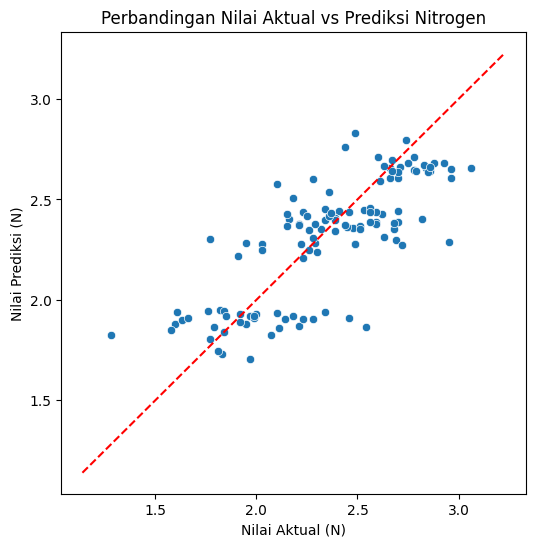

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Nilai Aktual (N)")
plt.ylabel("Nilai Prediksi (N)")
plt.title("Perbandingan Nilai Aktual vs Prediksi Nitrogen")
plt.show()

Gambar tersebut menunjukkan perbandingan antara nilai Nitrogen yang sebenarnya dengan hasil prediksi model. Titik-titik biru yang mendekati garis merah menandakan bahwa prediksi model cukup akurat dan mengikuti pola nilai sebenarnya. Semakin rapat titik-titik pada garis merah, semakin baik kemampuan model dalam memprediksi kadar Nitrogen di tanah.

#**KESIMPULAN**

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan menggunakan algoritma Linear Regression, dapat disimpulkan bahwa model mampu memprediksi kadar Nitrogen (N) di tanah dengan cukup baik berdasarkan data citra satelit. Proses dimulai dari pembacaan dataset yang berisi 594 sampel dan 34 variabel, dilanjutkan dengan analisis korelasi untuk menentukan fitur-fitur yang memiliki hubungan paling kuat terhadap kadar Nitrogen, seperti Lattitude, P, Sigma_VV, Sigma_VH dan lain-lain.

Model kemudian dilatih menggunakan 80% data latih dan diuji dengan 20% data uji. Hasil evaluasi menunjukkan nilai MAE sebesar 0.1862, RMSE sebesar 0.2362, dan R² sebesar 0.5894, yang berarti sekitar 58,9% variasi kadar Nitrogen dapat dijelaskan oleh model. Nilai error yang cukup kecil dan hasil visualisasi scatter plot yang menunjukkan titik-titik mendekati garis diagonal menandakan bahwa model memiliki performa yang cukup baik.

Secara keseluruhan, model Linear Regression berhasil menangkap hubungan antara fitur-fitur satelit dengan kadar Nitrogen di tanah, meskipun masih terdapat ruang untuk peningkatan akurasi dengan menambahkan fitur lain atau menggunakan algoritma yang lebih kompleks.